## Hands-On Data Preprocessing in Python
Learn how to effectively prepare data for successful data analytics
    
    AUTHOR: Dr. Roy Jafari 

### Chapter 7: Classification 
#### Excercises

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from ipywidgets import interact, widgets

# Excercise 1
The chapter asserts that before using KNN you will need to have your independent attributes normalized. This is certainly true, but how come we were able to get away with no-normalization when we performed KNN using visualization? See Figure 7.3. 


When using visualizations like scatter plots, you are typically only plotting 2 variables at a time, each on their own axis. Each axis has its own scale — and matplotlib or seaborn automatically adjusts the plot to fit.

# Excercise 2
We did not normalize the data when applying the Decision Tree to the Loan Application problem. For practice and deeper understanding, apply the Decision Tree to the normalized data, and answer the following questions. 

In [46]:
applicant_df = pd.read_csv("CustomerLoan.csv")
applicant_df.drop(columns=['Name'], inplace=True)
applicant_df['income_Normalized'] = ((applicant_df.income - applicant_df.income.min()) 
							/ (applicant_df.income.max() - applicant_df.income.min()))
applicant_df['score_Normalized'] = ((applicant_df.score - applicant_df.score.min())
                            / (applicant_df.score.max() - applicant_df.score.min()))

In [47]:
from sklearn.tree import DecisionTreeClassifier

predictors = ['income_Normalized', 'score_Normalized']
target = 'default'

Xs = applicant_df[predictors].drop(index=[20])
y = applicant_df[target].drop(index=[20])

classTree = DecisionTreeClassifier()
classTree.fit(Xs, y)

newApplicant = pd.DataFrame({
	'income_Normalized': applicant_df.iloc[20].income_Normalized,
	'score_Normalized': applicant_df.iloc[20].score_Normalized
}, index=[20])

predict_y = classTree.predict(newApplicant)
print(predict_y)

['Yes']


    a.	Did the conclusion of the Decision Tree change? Why do you think that is? Use the mechanism of the algorithm to explain.

No. Unlike algorithms like KNN or Logistic Regression, which are distance-based or gradient-based, Decision Trees work by splitting the data based on thresholds. These thresholds are derived by checking where the data can be split to best reduce impurity (Gini or entropy). The actual scale of the variable is irrelevant — what matters is the relative order of the values.

    b.	Did the Decision Tree tree-like structure change? In what ways? Does the change make a meaningful difference 

Yes, the tree structure can change slightly — but often not in a meaningful way.

# Excercise 3
For this exercise, we are going to use the Customer Churn.csv. This dataset is randomly collected from an Iranian telecom company’s database over a period of 12 months. A total of 3150 rows of data, each representing a customer, bear information for 13 columns. The attributes that are in this dataset are listed below:
    
    Call Failures: number of call failures
    Complains: binary (0: No complaint, 1: complaint)
    Subscription Length: total months of subscription
    Seconds of Use: total seconds of calls
    Frequency of use: total number of calls
    Frequency of SMS: total number of text messages
    Distinct Called Numbers: total number of distinct phone calls
    Status: binary (1: active, 0: non-active)
    Churn: binary (1: churn, 0: non-churn) - Class label

All of the attributes except for attribute churn are the aggregated data of the first 9 months. The churn labels are the state of the customers at the end of 12 months. The three months is the designated planning gap.

Using the above data, we would like to use this dataset to predict if the following customer will churn in three months. Call Failures: 8, Complains: 1, Subscription Length: 40, Seconds of Use: 4472, Frequency of use: 70, 
Frequency of SMS: 100, 	Distinct Called Numbers: 25, Status: 1. 

To do this, perform the following steps.

    a.	Read the data into the pandas DataFrame customer_df.

In [48]:
customer_df = pd.read_csv("Customer Churn.csv")
customer_df.head()

,Call Failure,Complains,Subscription Length,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Status,Churn
0,8,0,38,4370,71,5,17,1,0
1,0,0,39,318,5,7,4,0,0
2,10,0,37,2453,60,359,24,1,0
3,10,0,38,4198,66,1,35,1,0
4,3,0,38,2393,58,2,33,1,0


    b.	Use the skills you picked up in chapter 5 Data Visualization to come up with data visualizations that show the relationship between the attribute churn and the rest of the attributes.

In [49]:
customer_df.columns

Index(['Call  Failure', 'Complains', 'Subscription  Length', 'Seconds of Use',
       'Frequency of use', 'Frequency of SMS', 'Distinct Called Numbers',
       'Status', 'Churn'],
      dtype='object')

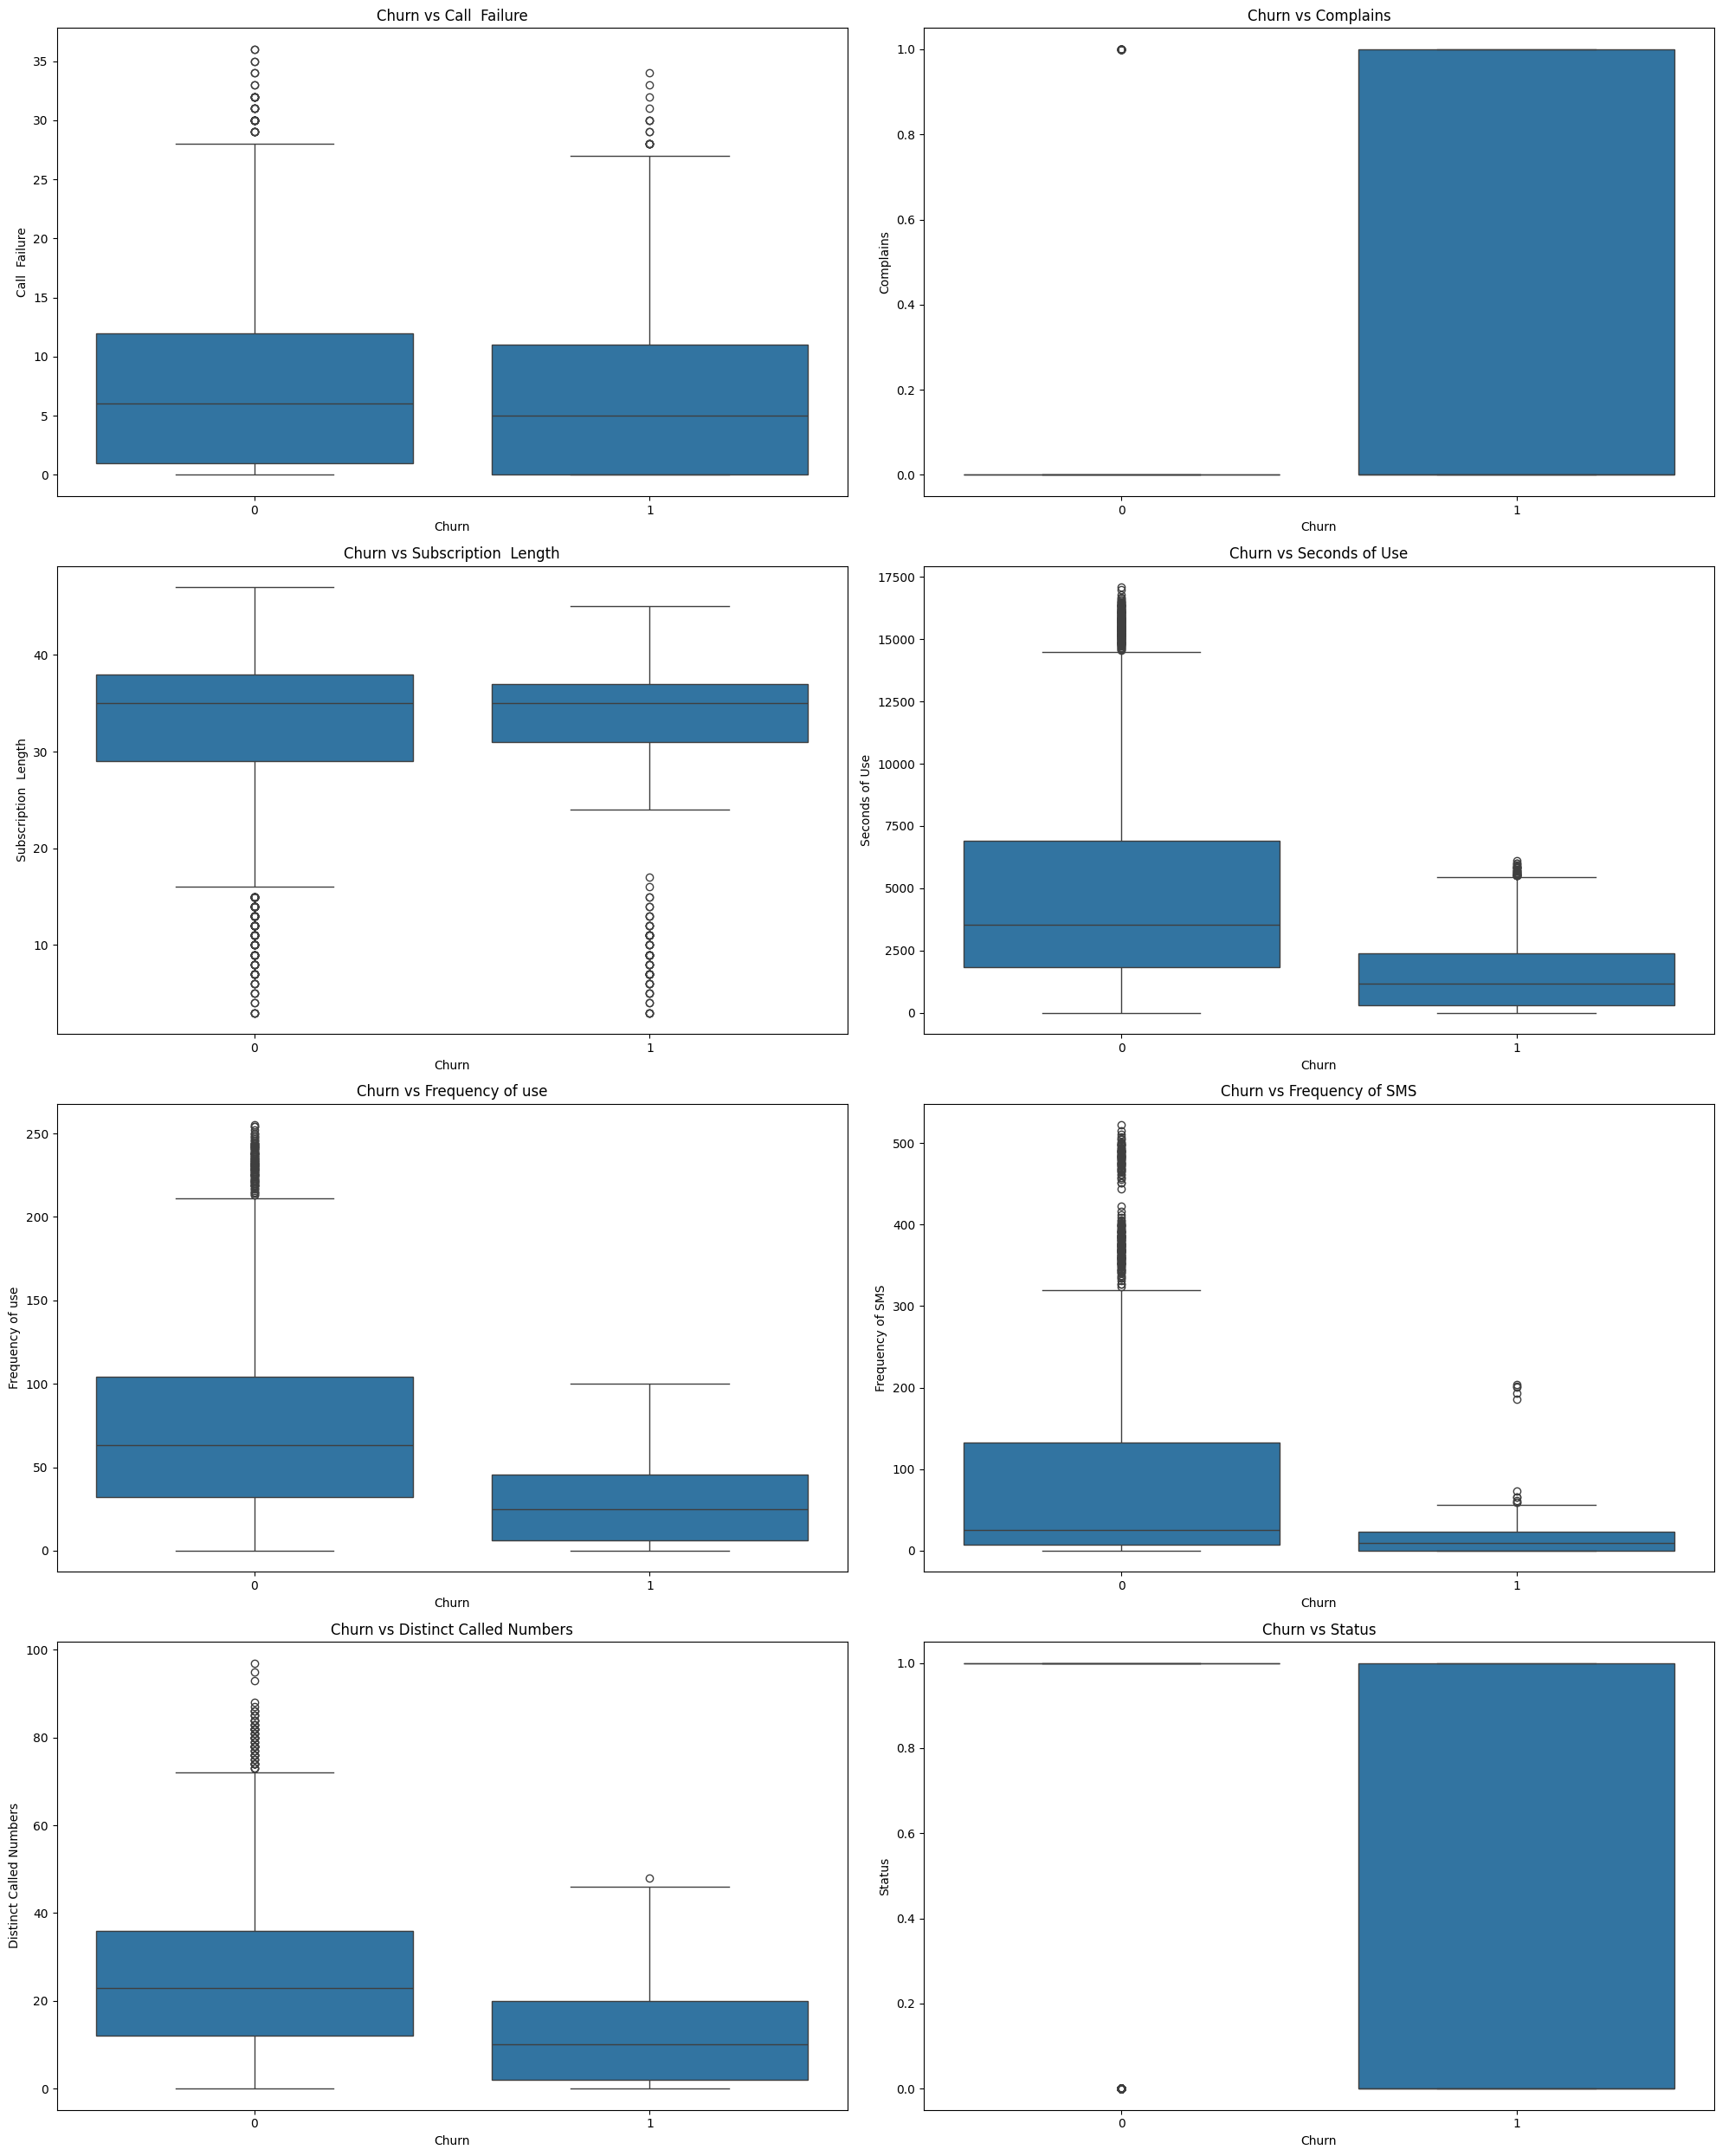

In [50]:
numerical_features = ['Call  Failure', 'Complains', 'Subscription  Length', 
                    'Seconds of Use', 'Frequency of use', 'Frequency of SMS', 
                    'Distinct Called Numbers', 'Status']

plt.figure(figsize=(20, 25))

for i, feature in enumerate(numerical_features):
    plt.subplot(4, 2, i+1)
    sns.boxplot(x='Churn', y=feature, data=customer_df)
    plt.title(f'Churn vs {feature}')

plt.tight_layout()
plt.show()

In [51]:
customer_df.corr()

,Call Failure,Complains,Subscription Length,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Status,Churn
Call Failure,1.000000,0.152879,0.169737,0.501607,0.573349,-0.022282,0.504058,0.114645,-0.008987
Complains,0.152879,1.000000,-0.020286,-0.104952,-0.090774,-0.111633,-0.058199,-0.271405,0.532053
Subscription Length,0.169737,-0.020286,1.000000,0.124618,0.106534,0.076318,0.092009,-0.142841,-0.032588
Seconds of Use,0.501607,-0.104952,0.124618,1.000000,0.946489,0.102123,0.676536,0.460618,-0.298935
Frequency of use,0.573349,-0.090774,0.106534,0.946489,1.000000,0.100019,0.736114,0.454752,-0.303337
Frequency of SMS,-0.022282,-0.111633,0.076318,0.102123,0.100019,1.000000,0.079650,0.296164,-0.220754
Distinct Called Numbers,0.504058,-0.058199,0.092009,0.676536,0.736114,0.079650,1.000000,0.413039,-0.278867
Status,0.114645,-0.271405,-0.142841,0.460618,0.454752,0.296164,0.413039,1.000000,-0.498976
Churn,-0.008987,0.532053,-0.032588,-0.298935,-0.303337,-0.220754,-0.278867,-0.498976,1.000000


    c.	Use the visuals in b, to describe the relationship each of the attributes has with the attribute price.

In [52]:
# based on b

    d.	Perform KNN to predict if the aforementioned customer will be churned using all of the attributes that had a meaningful relationship with churn.   

In [53]:
from sklearn.neighbors import KNeighborsClassifier

predictors = ['Seconds of Use', 'Frequency of use', 'Distinct Called Numbers']
target = 'Churn'

Xs = customer_df[predictors]
y = customer_df[target]

knn = KNeighborsClassifier()
knn.fit(Xs, y)

newApplicant = pd.DataFrame([{
	'Seconds of Use': 4472, 
	'Frequency of use': 70, 
	'Distinct Called Numbers': 25, 
}])

predict_y = knn.predict(newApplicant)
print(predict_y)

[0]


    e.	Repeat d, but this time use K=10. Are the conclusions different?

In [54]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(Xs, y)

predict_y2 = knn.predict(newApplicant)
print(predict_y2)

[0]


    f.	Now use the Decision Tree for classification. Is the conclusion of the Decision Tree different from that of the KNN? 

In [57]:
from sklearn.tree import DecisionTreeClassifier

classTree = DecisionTreeClassifier(max_depth=3)
classTree.fit(Xs, y)

predict_y3 = classTree.predict(newApplicant)
print(predict_y3)

[0]


    g.	Draw the tree-like structure of the Decision Tree and explain how the Decision Tree came to the conclusion it did. 

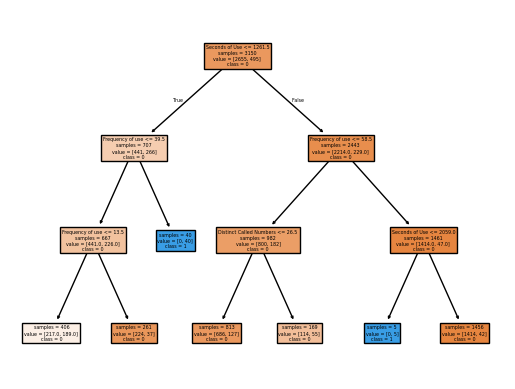

In [58]:
from sklearn.tree import plot_tree

plot_tree(classTree,
        feature_names=predictors,
        class_names=[str(label) for label in y.unique()],
        filled=True,
        impurity=False)

plt.show()